# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this a more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `train.csv`)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

# Solution

## Initializing and Importing

In [1]:
#initialize stuff
import pandas as pd
import matplotlib as plt
%matplotlib inline

## Looking at the Dataset

In [2]:
#load the file
housing_df=pd.read_csv("train.csv")
#look at the file 
housing_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
#look at the metadata about the file
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [5]:
#Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
housing_df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [ ]:
#looking at different pairings of variables 
pd.plotting.scatter_matrix(housing_df, figsize=(15,15))

## Exploratory Data Analysis

### 2-Way Split #1: NOx levels
NOx refers to NO and NO2 levels collectively.  NOx is a pollutant and is harmful in high concentrations.  Because of that, I'm going to split the dataset into entries with low levels of NOx and high levels.  The EPA guidelines mention 0.53 parts per 10 million as an upper limit for NO2 emissions (which make up only part of NOx emissions) so I'm going to use 0.53 as my cutoff for what counts as a low level of NOx.

In [6]:
#creating the NOx dataframe subset
nox_subset=housing_df.loc[:,("nox")]
nox_subset.describe()

count    333.000000
mean       0.557144
std        0.114955
min        0.385000
25%        0.453000
50%        0.538000
75%        0.631000
max        0.871000
Name: nox, dtype: float64

Looking at the 1-variable statistics for the NOx data, I see that the median value is 0.538 (which means that about half of the entries will be below that and marked as "low" while the other half will be marked as "high.") 

In [15]:
#.53 pp10m and above, high. Below 0.53 pp10m is low.
high_nox=housing_df[housing_df.loc[:,("nox")]>0.53]
low_nox=housing_df[housing_df.loc[:,"nox"]<=0.53]
print(f"There are {len(high_nox)} instances of high NOx levels.")
print(f"There are {len(low_nox)} instances of low NOx levels.")

There are 174 instances of high NOx levels.
There are 159 instances of low NOx levels.


In [16]:
high_nox.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.00000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,313.373563,6.311883,1.022989,16.479713,0.057471,0.645052,6.018891,86.912644,2.34815,14.235632,515.408046,19.057471,332.985230,16.185402,19.163218
std,154.217599,9.239655,4.395155,5.355996,0.233413,0.087628,0.684269,14.947954,0.80671,9.943580,170.342905,2.350975,110.658573,7.124213,9.020088
min,1.000000,0.006320,0.000000,2.310000,0.000000,0.532000,3.561000,29.300000,1.12960,1.000000,188.000000,13.000000,3.500000,1.730000,5.000000
25%,155.500000,0.569400,0.000000,12.420000,0.000000,0.581000,5.713000,81.650000,1.78365,4.000000,391.000000,18.400000,338.702500,11.485000,13.800000
50%,372.500000,3.043800,0.000000,18.100000,0.000000,0.624000,6.012500,92.650000,2.16765,24.000000,666.000000,20.200000,387.375000,15.145000,17.900000
75%,445.750000,8.660902,0.000000,18.100000,0.000000,0.700000,6.367750,97.375000,2.72825,24.000000,666.000000,20.200000,395.750000,20.030000,21.800000
max,506.000000,73.534100,20.000000,27.740000,1.000000,0.871000,8.398000,100.000000,4.70750,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [17]:
low_nox.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,182.641509,0.130353,21.267296,5.617987,0.062893,0.460943,6.535623,47.777358,5.200187,4.597484,293.138365,17.781132,388.445157,8.499245,26.714465
std,104.455265,0.130702,29.046546,3.075852,0.243538,0.039193,0.623056,24.761283,1.804834,1.866153,59.834527,1.679631,26.976919,4.281159,7.599807
min,2.000000,0.009060,0.000000,0.740000,0.000000,0.385000,5.404000,6.000000,2.122400,1.000000,193.000000,12.600000,70.800000,1.980000,15.000000
25%,79.500000,0.044205,0.000000,3.370000,0.000000,0.431000,6.118000,29.450000,3.658450,3.000000,244.000000,16.600000,389.555000,5.440000,21.700000
50%,194.000000,0.086640,0.000000,5.190000,0.000000,0.449000,6.417000,45.600000,5.214600,5.000000,289.000000,17.900000,393.740000,7.670000,24.400000
75%,274.500000,0.165995,33.000000,6.910000,0.000000,0.501500,6.838000,67.350000,6.461900,5.000000,329.000000,18.950000,396.615000,10.170000,30.950000
max,353.000000,0.623560,100.000000,15.040000,1.000000,0.524000,8.725000,97.100000,10.710300,8.000000,469.000000,21.100000,396.900000,29.550000,50.000000


I notice that the high and low NOx groups have markedly different crime rates per capita so I'm going to make graphs to compare the NOx levels and crime rates for both the high and low NOx level groups.  It also looks like there's a much bigger standard deviation for the crime rates between the two groups.

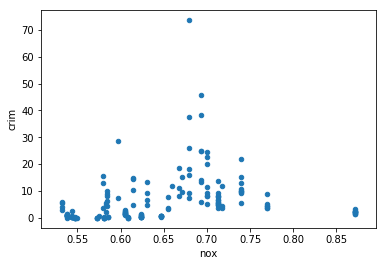

In [26]:
high_nox.plot("nox","crim",kind="scatter")

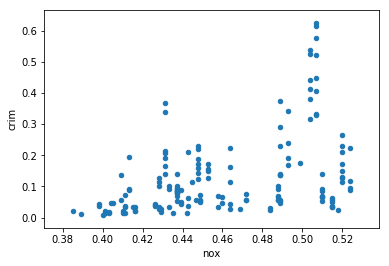

In [27]:
low_nox.plot("nox","crim",kind="scatter")

Text(0, 0.5, '')

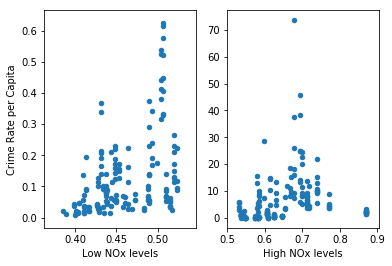

In [51]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2)

low_nox.plot("nox","crim",kind="scatter",ax=ax1)
high_nox.plot("nox","crim",kind="scatter",ax=ax2)
ax1.xaxis.set_label_text("Low NOx levels")
ax2.xaxis.set_label_text("High NOx levels")
ax1.yaxis.set_label_text("Crime Rate per Capita")
ax2.yaxis.set_label_text("")

They might look pretty similar until we notice that the vertical axis is counted differently for each graph.  So here are the graphs again, but with the same scale for the y-axis (and the same spacing for the x-axis).

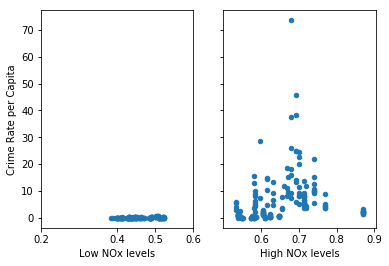

In [84]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, sharey=True)
low_nox.plot("nox","crim",kind="scatter",ax=ax1)
high_nox.plot("nox","crim",kind="scatter",ax=ax2)
ax1.xaxis.set_label_text("Low NOx levels")
ax2.xaxis.set_label_text("High NOx levels")
ax1.yaxis.set_label_text("Crime Rate per Capita")
ax2.yaxis.set_label_text("")

ax1.xaxis.set_ticks([0.2,0.4,0.5,0.6])
ax2.xaxis.set_ticks([0.6,0.7,0.8,0.9])

As we can see, the crime rate in areas with low NOx levels is a lot different than in areas with high NOx levels. The crime rate also doesn't vary nearly as much in the low NOx areas.

Finally, let's look at the boxplots.

Text(0.5, 0, 'High NOx levels')

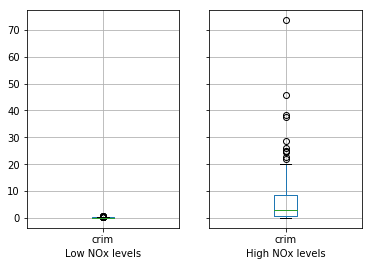

In [75]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, sharey=True)
low_nox.boxplot(column=["crim"],ax=ax1)
high_nox.boxplot(column=["crim"],ax=ax2)
ax1.xaxis.set_label_text("Low NOx levels")
ax2.xaxis.set_label_text("High NOx levels")

### 2-Way Split #2: Pupil to Teacher Ratios

For the purposes of this investigation, I'm going to say that any classroom with more than 20 students per teacher is over-crowded.

In [76]:
#creating the pupil-teacher ratio dataframe subset
ptratio_subset=housing_df.loc[:,("ptratio")]
ptratio_subset.describe()

count    333.000000
mean      18.448048
std        2.151821
min       12.600000
25%       17.400000
50%       19.000000
75%       20.200000
max       21.200000
Name: ptratio, dtype: float64

In [79]:
ptratio_subset.head(10)

0    15.3
1    17.8
2    18.7
3    18.7
4    15.2
5    15.2
6    15.2
7    15.2
8    21.0
9    21.0
Name: ptratio, dtype: float64

In [77]:
#above 20, overcrowded. 20 or below is ideal.
high_ptratio=housing_df[housing_df.loc[:,("ptratio")]>20]
low_ptratio=housing_df[housing_df.loc[:,"ptratio"]<=20]
print(f"There are {len(high_ptratio)} instances of overcrowded classrooms.")
print(f"There are {len(low_ptratio)} instances of ideal pupil-teacher ratios.")

There are 134 instances of overcrowded classrooms.
There are 199 instances of ideal pupil-teacher ratios.


In [80]:
high_ptratio.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,343.425373,7.791269,0.559701,16.267313,0.037313,0.633754,5.959888,86.020149,2.529311,17.141791,565.597015,20.421642,325.542985,16.926194,17.428358
std,155.884928,10.060354,6.479013,5.081365,0.190240,0.080156,0.601717,17.193323,1.128867,9.541483,158.045445,0.378633,122.383524,6.902340,7.572562
min,14.000000,0.013600,0.000000,4.000000,0.000000,0.410000,3.561000,29.300000,1.129600,1.000000,224.000000,20.100000,3.500000,2.960000,5.000000
25%,335.500000,0.815042,0.000000,18.100000,0.000000,0.573000,5.757500,81.600000,1.796150,5.000000,437.000000,20.200000,331.490000,12.262500,12.925000
50%,401.500000,5.247410,0.000000,18.100000,0.000000,0.627500,6.055000,92.150000,2.205700,24.000000,666.000000,20.200000,389.555000,16.515000,17.150000
75%,457.500000,9.956117,0.000000,18.100000,0.000000,0.700000,6.323750,97.975000,2.818175,24.000000,666.000000,20.900000,396.900000,20.550000,20.200000
max,506.000000,73.534100,75.000000,27.740000,1.000000,0.770000,7.393000,100.000000,7.319700,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [81]:
low_ptratio.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,188.683417,0.376702,17.510050,7.944271,0.075377,0.505558,6.471487,56.244724,4.504926,4.577889,304.020101,17.119095,382.308794,9.545377,26.364824
std,103.204491,0.648134,26.790006,6.062774,0.264664,0.105808,0.694162,27.749015,2.036304,1.776023,66.999771,1.804606,34.734833,5.452167,8.383743
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,4.926000,6.000000,1.321600,1.000000,188.000000,12.600000,88.630000,1.730000,13.100000
25%,92.500000,0.054970,0.000000,3.610000,0.000000,0.437000,6.006500,32.600000,2.794100,3.500000,260.000000,15.400000,383.490000,5.600000,21.000000
50%,188.000000,0.122690,0.000000,6.090000,0.000000,0.488000,6.377000,56.400000,4.090000,5.000000,296.000000,17.800000,392.780000,8.580000,23.900000
75%,268.000000,0.335650,25.000000,10.010000,0.000000,0.544000,6.838000,81.700000,6.011300,5.000000,341.000000,18.600000,396.025000,11.990000,30.750000
max,500.000000,3.321050,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,10.710300,8.000000,432.000000,19.700000,396.900000,29.550000,50.000000


In comparing the descriptive statistics for datasets, several things jump out including the following: the areas with a high pupil-to-teacher ratio have a higher crime rate, more non-retail businesses, fewer rooms per dwelling, and older buildings.

There are other relationships, too: areas with a lower pupil-to-teacher ratio are more likely to be adjacent to the Charles river, to be farther away from employment centers, and to have a lower full-value property-tax rate per $10,000.

For this exploration, I'm going to compare the number of rooms in a dwelling to the pupil-to-teacher ratio.

Text(0.5, 0.98, 'Rooms per Dwelling')

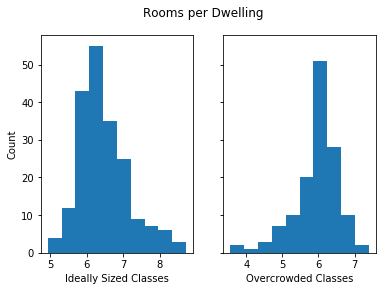

In [101]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, sharey=True)

low_ptratio.plot("ptratio","rm",kind="hist",ax=ax1,legend=False)
high_ptratio.plot("ptratio","rm",kind="hist",ax=ax2,legend=False)
ax1.xaxis.set_label_text("Ideally Sized Classes")
ax2.xaxis.set_label_text("Overcrowded Classes")
ax1.yaxis.set_label_text("Count")
ax2.yaxis.set_label_text("")
fig.suptitle("Rooms per Dwelling")

Both have a mode of around 6 rooms per dwelling but the areas with ideally sized classes show a skewed right distribution (meaning they have more rooms per dwelling than expected, so the mean is higher than the median).  The areas with overcrowded classes give a skewed left distributions, meaning that there are fewer rooms per dwelling than expected (so the mean is lower than the median).

Text(0.5, 0, 'Overcrowded Classes')

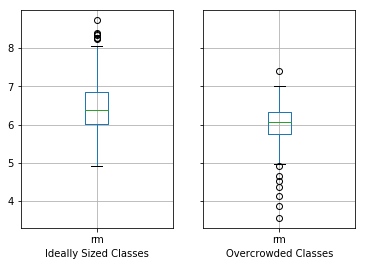

In [102]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, sharey=True)
low_ptratio.boxplot(column=["rm"],ax=ax1)
high_ptratio.boxplot(column=["rm"],ax=ax2)
ax1.xaxis.set_label_text("Ideally Sized Classes")
ax2.xaxis.set_label_text("Overcrowded Classes")

### 2-Way Split #3: Adjacent to the Charles River

In this exploration, I'm going to start by splitting the housing dataset into two parts: adjacent to the Charles River and not adjacent.

In [107]:
#creating the NOx dataframe subset
chas_subset=housing_df.loc[:,("chas")]
chas_subset.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: chas, dtype: int64

There are only two possiblities: 1 means it's adjacent and 0 means it's not adjacent.  Let's start by counting how many there are in each category.

In [110]:
chas_subset.value_counts()

0    313
1     20
Name: chas, dtype: int64

In [116]:
adjacent=housing_df[housing_df.loc[:,("chas")]==1]
non_adjacent=housing_df[housing_df.loc[:,("chas")]==0]

In [117]:
adjacent.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,255.600000,2.163972,8.500000,12.330000,1.0,0.593595,6.577750,75.815000,3.069540,9.900000,394.550000,17.38500,380.681000,11.118000,30.175000
std,75.913663,2.885734,21.830688,6.505255,0.0,0.146237,0.814341,22.808638,1.343724,8.534142,171.795005,2.22906,21.661541,7.198281,12.362204
min,143.000000,0.015010,0.000000,1.210000,1.0,0.401000,5.403000,24.800000,1.129600,1.000000,198.000000,13.60000,321.020000,2.960000,13.400000
25%,211.250000,0.200377,0.000000,6.200000,1.0,0.489000,6.111250,58.325000,2.041250,4.750000,276.750000,14.85000,377.565000,5.007500,21.700000
50%,236.000000,0.572070,0.000000,12.240000,1.0,0.528500,6.322500,86.000000,3.080050,5.000000,307.000000,17.40000,390.580000,9.735000,26.050000
75%,302.250000,3.453213,0.000000,18.100000,1.0,0.693500,6.913250,92.925000,4.095200,12.000000,468.750000,19.00000,395.240000,14.775000,37.900000
max,373.000000,8.982960,90.000000,19.580000,1.0,0.871000,8.375000,100.000000,5.885000,24.000000,666.000000,20.20000,396.900000,26.820000,50.000000


In [118]:
non_adjacent.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,313.000000,313.000000,313.000000,313.000000,313.0,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,250.654952,3.436787,10.829073,11.227252,0.0,0.554815,6.245674,67.741534,3.750853,9.616613,410.220447,18.515974,358.110511,12.604728,22.295527
std,151.365227,7.544289,22.754198,7.032974,0.0,0.112555,0.693026,28.400933,2.009606,8.768386,171.014186,2.132487,88.984202,7.061663,8.746397
min,1.000000,0.006320,0.000000,0.740000,0.0,0.385000,3.561000,6.000000,1.137000,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,118.000000,0.078750,0.000000,4.950000,0.0,0.453000,5.879000,43.700000,2.132900,4.000000,281.000000,17.400000,376.700000,7.220000,17.200000
50%,245.000000,0.245220,0.000000,9.690000,0.0,0.538000,6.185000,76.500000,3.092300,5.000000,330.000000,19.100000,392.230000,11.220000,21.200000
75%,387.000000,3.678220,12.500000,18.100000,0.0,0.624000,6.563000,93.800000,5.214600,24.000000,666.000000,20.200000,396.330000,16.440000,24.700000
max,506.000000,73.534100,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


There are several differences between the datasets but I've already explored crime, nitrogen levels, number of rooms per dwelling, and pupil-teacher ratios so this time I'm going to focus on another variable: age (which represents theproportion of owner-occupied units that were built prior to 1940). As the value for "age" increases,the number of older buildings/houses in an area increases.

Text(0.5, 0.98, 'Proportion of Pre-1940 Buildings')

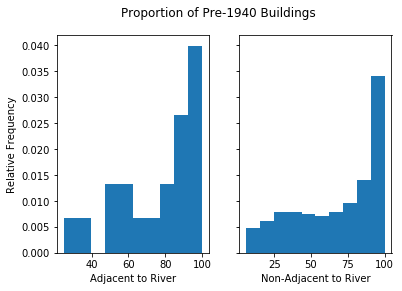

In [130]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, sharey=True)

adjacent.plot("chas","age",kind="hist",ax=ax1,legend=False,density=True,bins=10)
non_adjacent.plot("chas","age",kind="hist",ax=ax2,legend=False,density=True,bins=10)
ax1.xaxis.set_label_text("Adjacent to River")
ax2.xaxis.set_label_text("Non-Adjacent to River")
ax1.yaxis.set_label_text("Relative Frequency")
ax2.yaxis.set_label_text("")
fig.suptitle("Proportion of Pre-1940 Buildings")

There doesn't appear to be a major difference.  Both datasets have a significant number of older buildings.  The areas adjacent to the river have more areas with a 100% proportion of old homes but it's only 0.5% more areas than the non-adjacent areas.

Boxplots might make it easier to see the differences.

Text(0.5, 0, 'Non-adjacent')

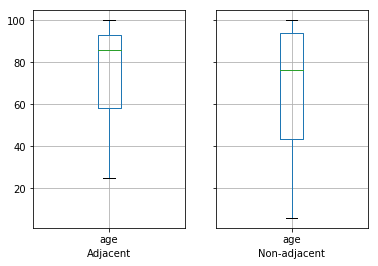

In [131]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, sharey=True)
adjacent.boxplot(column=["age"],ax=ax1)
non_adjacent.boxplot(column=["age"],ax=ax2)
ax1.xaxis.set_label_text("Adjacent")
ax2.xaxis.set_label_text("Non-adjacent")

The box plots make it a little clearer: areas that are adjacent to the Charles River are more likely to have a higher proportion of older buildings.  The non-adjacent areas also have old homes but the standard deviation of ages is a lot larger.  That means that the non-adjacent areas have buildings with a wider age range than the river-adjacent areas do.